# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

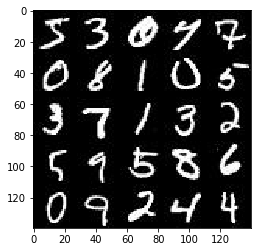

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

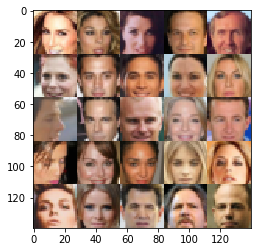

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0


C:\Users\Michael\AppData\Local\conda\conda\envs\kerasenv1\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels))
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return (inputs_real, inputs_z, learning_rate)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
         # NEW: 28x28x3
        
        alpha = 0.2
        nodes = int(256)
        
        x1 = tf.layers.conv2d(images, int(nodes/4), 5, strides=1, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # NEW: 28x28x64
        
        x2 = tf.layers.conv2d(relu1, int(nodes/2), 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        drop2 = tf.layers.dropout(bn2,rate=0.2,training=True)
        relu2 = tf.maximum(alpha * drop2, drop2)
        # NEW: 14x14x128
        
        x3 = tf.layers.conv2d(relu2, int(nodes), 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        drop3 = tf.layers.dropout(bn3,rate=0.2,training=True)
        relu3 = tf.maximum(alpha * drop3, drop3)
        # NEW: 7x7x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, int(7*7*nodes)))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # MOD: Modify dimensions to fit 28x28x3 in output
    
    alpha = 0.2
    nodes = int(1024)
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
#        x1 = tf.layers.dense(z, 7*7*128)
        x1 = tf.layers.dense(z, 7*7*nodes)
        
        # Reshape it to start the convolutional stack
#        x1 = tf.reshape(x1, (-1,7, 7, 128))
        x1 = tf.reshape(x1, (-1,7, 7, int(nodes)))
        
#        print(x1.shape)
        x1 = tf.layers.batch_normalization(x1, training=is_train)
#        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.relu(x1)
        # 7*7*256 now
        
        
        x2 = tf.layers.conv2d_transpose(x1, int(nodes/2), 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
#        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.relu(x2)
        # 14*14*128 now

        x3 = tf.layers.conv2d_transpose(x2, int(nodes/4), 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
#        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.relu(x3)
        # 28*28*64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28*28*3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function

    alpha = 0.2
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)#, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)#, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    # Potentially include random number between 0 and 0.1 to d_loss_fake?!
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    # Try: Reduce learning rate of discriminator vs. generator!
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)   
    
    return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#    saver = tf.train.Saver()

    samples, losses = [], []
    steps = 0
    
    channels = 1 if data_image_mode == "L" else 3
#    print(np.ndim(data_shape))
    print(channels)

#   input_real, input_z, learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
#                print(np.ndim(batch_images))
                
                # Sample random noise for G
#                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_z = np.random.normal(loc=0.0, scale=0.6, size=(batch_size, z_dim))
                batch_images = batch_images *2
                # Include: randomly switch fake and true pictures for 5% of data?
#                print(np.amin(batch_images[1]))
#                print(np.amax(batch_images[1]))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                if steps % 10 == 0:
                    
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z}) 
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))                 
                    
                if steps % 100 == 0:                    
                    show_generator_output(sess, 4, input_z, channels, data_image_mode)
                    
# Include loss graph to better determine how generator is doing vs. discriminator?!                    
    return losses
        
        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

1
Epoch 1/2... Discriminator Loss: 0.3626... Generator Loss: 5.5482
Epoch 1/2... Discriminator Loss: 0.5752... Generator Loss: 5.4715
Epoch 1/2... Discriminator Loss: 0.4734... Generator Loss: 15.6002
Epoch 1/2... Discriminator Loss: 0.3695... Generator Loss: 7.0343
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 5.2606
Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 2.9843
Epoch 1/2... Discriminator Loss: 1.1392... Generator Loss: 3.7202
Epoch 1/2... Discriminator Loss: 0.7484... Generator Loss: 2.1282
Epoch 1/2... Discriminator Loss: 0.8256... Generator Loss: 1.2041
Epoch 1/2... Discriminator Loss: 0.9307... Generator Loss: 1.5267


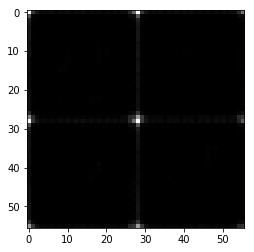

Epoch 1/2... Discriminator Loss: 1.6197... Generator Loss: 2.2962
Epoch 1/2... Discriminator Loss: 0.9745... Generator Loss: 1.1070
Epoch 1/2... Discriminator Loss: 1.2132... Generator Loss: 2.0246
Epoch 1/2... Discriminator Loss: 1.3558... Generator Loss: 1.9083
Epoch 1/2... Discriminator Loss: 1.1708... Generator Loss: 0.9152
Epoch 1/2... Discriminator Loss: 1.1663... Generator Loss: 1.2364
Epoch 1/2... Discriminator Loss: 1.0294... Generator Loss: 1.6980
Epoch 1/2... Discriminator Loss: 0.9068... Generator Loss: 1.2119
Epoch 1/2... Discriminator Loss: 1.2816... Generator Loss: 0.7737
Epoch 1/2... Discriminator Loss: 1.1042... Generator Loss: 0.8772


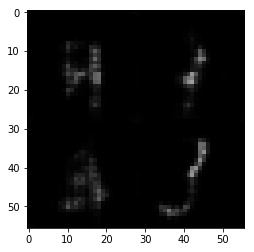

Epoch 1/2... Discriminator Loss: 0.9466... Generator Loss: 1.3571
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 1.1802
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 0.8455
Epoch 1/2... Discriminator Loss: 1.4485... Generator Loss: 0.5833
Epoch 1/2... Discriminator Loss: 0.9004... Generator Loss: 1.2571
Epoch 1/2... Discriminator Loss: 1.1169... Generator Loss: 1.2013
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.5799... Generator Loss: 0.4847
Epoch 1/2... Discriminator Loss: 1.6181... Generator Loss: 0.4117
Epoch 1/2... Discriminator Loss: 1.0848... Generator Loss: 0.9654


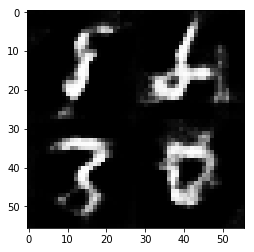

Epoch 1/2... Discriminator Loss: 1.2762... Generator Loss: 0.8715
Epoch 1/2... Discriminator Loss: 1.4092... Generator Loss: 0.5427
Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 1.1574
Epoch 1/2... Discriminator Loss: 1.1940... Generator Loss: 0.8822
Epoch 1/2... Discriminator Loss: 1.0261... Generator Loss: 1.2352
Epoch 1/2... Discriminator Loss: 1.2786... Generator Loss: 1.8354
Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 0.7837
Epoch 1/2... Discriminator Loss: 1.1054... Generator Loss: 1.5618
Epoch 1/2... Discriminator Loss: 1.2088... Generator Loss: 1.1576
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.8737


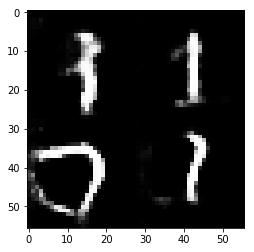

Epoch 1/2... Discriminator Loss: 1.0651... Generator Loss: 0.9259
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 0.7881
Epoch 1/2... Discriminator Loss: 1.2253... Generator Loss: 0.8805
Epoch 1/2... Discriminator Loss: 1.0681... Generator Loss: 0.9668
Epoch 1/2... Discriminator Loss: 1.2713... Generator Loss: 0.7133
Epoch 1/2... Discriminator Loss: 1.3137... Generator Loss: 0.7286
Epoch 1/2... Discriminator Loss: 1.4169... Generator Loss: 0.5784
Epoch 1/2... Discriminator Loss: 1.2655... Generator Loss: 0.7916
Epoch 1/2... Discriminator Loss: 1.2613... Generator Loss: 0.9932
Epoch 1/2... Discriminator Loss: 1.3472... Generator Loss: 1.2310


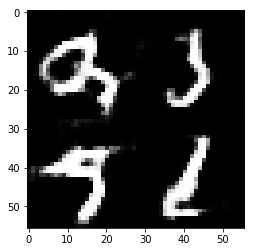

Epoch 1/2... Discriminator Loss: 1.3970... Generator Loss: 0.6104
Epoch 1/2... Discriminator Loss: 1.1267... Generator Loss: 0.9416
Epoch 1/2... Discriminator Loss: 1.1021... Generator Loss: 1.7293
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.9687
Epoch 1/2... Discriminator Loss: 1.1534... Generator Loss: 0.9274
Epoch 1/2... Discriminator Loss: 1.2675... Generator Loss: 0.9677
Epoch 1/2... Discriminator Loss: 1.3779... Generator Loss: 0.6619
Epoch 1/2... Discriminator Loss: 1.2616... Generator Loss: 0.8662
Epoch 1/2... Discriminator Loss: 1.1556... Generator Loss: 0.9777
Epoch 1/2... Discriminator Loss: 1.2357... Generator Loss: 0.7880


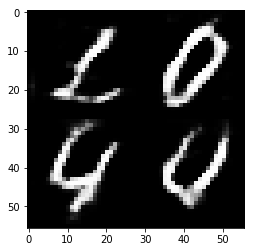

Epoch 1/2... Discriminator Loss: 1.3440... Generator Loss: 0.7744
Epoch 1/2... Discriminator Loss: 1.0425... Generator Loss: 1.4310
Epoch 1/2... Discriminator Loss: 1.1914... Generator Loss: 0.6899
Epoch 1/2... Discriminator Loss: 1.0339... Generator Loss: 1.9739
Epoch 1/2... Discriminator Loss: 1.1546... Generator Loss: 0.9530
Epoch 1/2... Discriminator Loss: 1.1902... Generator Loss: 0.9052
Epoch 1/2... Discriminator Loss: 1.0564... Generator Loss: 1.3432
Epoch 1/2... Discriminator Loss: 1.1380... Generator Loss: 1.4688
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.6819
Epoch 1/2... Discriminator Loss: 1.1288... Generator Loss: 0.7627


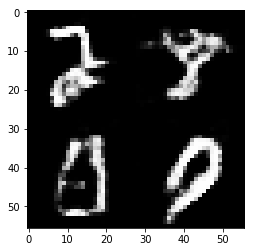

Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.8193
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 0.7572
Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 0.7700
Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 2.1049
Epoch 1/2... Discriminator Loss: 1.1831... Generator Loss: 1.9759
Epoch 1/2... Discriminator Loss: 0.8822... Generator Loss: 1.4348
Epoch 1/2... Discriminator Loss: 1.6192... Generator Loss: 0.4290
Epoch 1/2... Discriminator Loss: 1.2476... Generator Loss: 0.7082
Epoch 1/2... Discriminator Loss: 1.1874... Generator Loss: 1.4070
Epoch 1/2... Discriminator Loss: 1.1318... Generator Loss: 0.8166


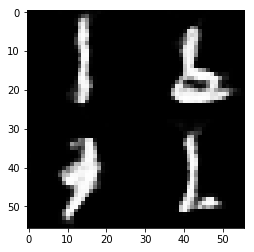

Epoch 1/2... Discriminator Loss: 0.9672... Generator Loss: 1.0700
Epoch 1/2... Discriminator Loss: 1.1218... Generator Loss: 0.7709
Epoch 1/2... Discriminator Loss: 2.2250... Generator Loss: 3.5663
Epoch 1/2... Discriminator Loss: 0.8599... Generator Loss: 1.3406
Epoch 1/2... Discriminator Loss: 0.8852... Generator Loss: 1.1451
Epoch 1/2... Discriminator Loss: 1.2776... Generator Loss: 0.9516
Epoch 1/2... Discriminator Loss: 1.5357... Generator Loss: 1.7660
Epoch 1/2... Discriminator Loss: 0.9358... Generator Loss: 1.2666
Epoch 1/2... Discriminator Loss: 1.1074... Generator Loss: 1.7379
Epoch 1/2... Discriminator Loss: 0.9959... Generator Loss: 1.0289


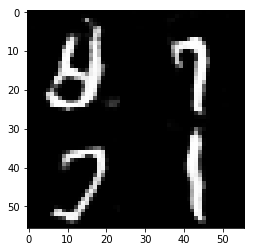

Epoch 1/2... Discriminator Loss: 1.1533... Generator Loss: 0.9611
Epoch 1/2... Discriminator Loss: 1.1369... Generator Loss: 1.4858
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 0.6505
Epoch 2/2... Discriminator Loss: 2.3919... Generator Loss: 0.1941
Epoch 2/2... Discriminator Loss: 0.9218... Generator Loss: 1.2440
Epoch 2/2... Discriminator Loss: 0.9855... Generator Loss: 0.9329
Epoch 2/2... Discriminator Loss: 1.3013... Generator Loss: 1.9341
Epoch 2/2... Discriminator Loss: 1.0402... Generator Loss: 1.7780
Epoch 2/2... Discriminator Loss: 1.2147... Generator Loss: 0.7269
Epoch 2/2... Discriminator Loss: 0.9904... Generator Loss: 1.4032


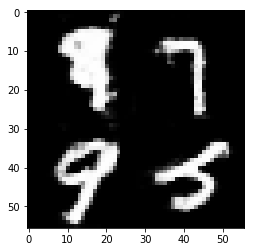

Epoch 2/2... Discriminator Loss: 0.9495... Generator Loss: 1.4651
Epoch 2/2... Discriminator Loss: 0.7142... Generator Loss: 1.5536
Epoch 2/2... Discriminator Loss: 0.7425... Generator Loss: 1.4521
Epoch 2/2... Discriminator Loss: 1.2741... Generator Loss: 0.6096
Epoch 2/2... Discriminator Loss: 1.0532... Generator Loss: 1.7315
Epoch 2/2... Discriminator Loss: 1.0840... Generator Loss: 0.8504
Epoch 2/2... Discriminator Loss: 0.8824... Generator Loss: 1.1971
Epoch 2/2... Discriminator Loss: 1.2387... Generator Loss: 0.6343
Epoch 2/2... Discriminator Loss: 1.1839... Generator Loss: 0.6907
Epoch 2/2... Discriminator Loss: 1.0108... Generator Loss: 0.9620


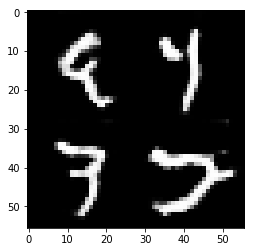

Epoch 2/2... Discriminator Loss: 1.0842... Generator Loss: 0.8112
Epoch 2/2... Discriminator Loss: 0.8401... Generator Loss: 1.5584
Epoch 2/2... Discriminator Loss: 0.7886... Generator Loss: 1.8797
Epoch 2/2... Discriminator Loss: 1.3324... Generator Loss: 0.6507
Epoch 2/2... Discriminator Loss: 1.2427... Generator Loss: 0.6604
Epoch 2/2... Discriminator Loss: 0.8478... Generator Loss: 1.3894
Epoch 2/2... Discriminator Loss: 1.6979... Generator Loss: 0.3419
Epoch 2/2... Discriminator Loss: 2.0718... Generator Loss: 0.2489
Epoch 2/2... Discriminator Loss: 0.9836... Generator Loss: 0.9734
Epoch 2/2... Discriminator Loss: 0.8197... Generator Loss: 1.2913


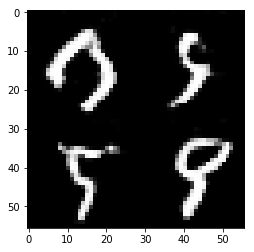

Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 1.2263
Epoch 2/2... Discriminator Loss: 0.9677... Generator Loss: 1.2622
Epoch 2/2... Discriminator Loss: 1.4212... Generator Loss: 0.5952
Epoch 2/2... Discriminator Loss: 0.8713... Generator Loss: 1.1471
Epoch 2/2... Discriminator Loss: 0.9558... Generator Loss: 2.1192
Epoch 2/2... Discriminator Loss: 0.8946... Generator Loss: 1.8154
Epoch 2/2... Discriminator Loss: 0.9266... Generator Loss: 0.9667
Epoch 2/2... Discriminator Loss: 1.2296... Generator Loss: 0.6420
Epoch 2/2... Discriminator Loss: 0.8567... Generator Loss: 1.0987
Epoch 2/2... Discriminator Loss: 1.1545... Generator Loss: 2.5763


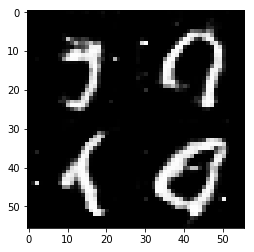

Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 0.9617
Epoch 2/2... Discriminator Loss: 1.2645... Generator Loss: 1.8149
Epoch 2/2... Discriminator Loss: 1.1205... Generator Loss: 2.3233
Epoch 2/2... Discriminator Loss: 0.7697... Generator Loss: 1.6483
Epoch 2/2... Discriminator Loss: 4.2542... Generator Loss: 0.0604
Epoch 2/2... Discriminator Loss: 1.1257... Generator Loss: 0.9196
Epoch 2/2... Discriminator Loss: 0.8527... Generator Loss: 1.1916
Epoch 2/2... Discriminator Loss: 0.9766... Generator Loss: 0.9134
Epoch 2/2... Discriminator Loss: 0.7451... Generator Loss: 1.7383
Epoch 2/2... Discriminator Loss: 0.9565... Generator Loss: 1.2238


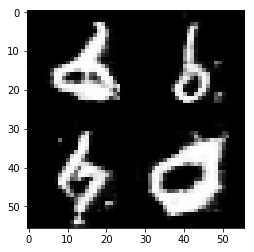

Epoch 2/2... Discriminator Loss: 0.8484... Generator Loss: 1.3564
Epoch 2/2... Discriminator Loss: 1.1197... Generator Loss: 1.7795
Epoch 2/2... Discriminator Loss: 0.9204... Generator Loss: 1.0624
Epoch 2/2... Discriminator Loss: 0.7488... Generator Loss: 1.3384
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 1.7504
Epoch 2/2... Discriminator Loss: 1.1660... Generator Loss: 0.9323
Epoch 2/2... Discriminator Loss: 0.9157... Generator Loss: 1.1547
Epoch 2/2... Discriminator Loss: 0.9228... Generator Loss: 0.9795
Epoch 2/2... Discriminator Loss: 0.8171... Generator Loss: 1.1893
Epoch 2/2... Discriminator Loss: 0.8235... Generator Loss: 1.4163


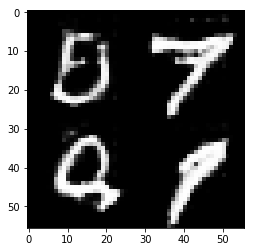

Epoch 2/2... Discriminator Loss: 0.6981... Generator Loss: 1.7614
Epoch 2/2... Discriminator Loss: 1.6815... Generator Loss: 0.4037
Epoch 2/2... Discriminator Loss: 0.6076... Generator Loss: 1.9377
Epoch 2/2... Discriminator Loss: 0.5968... Generator Loss: 1.9784
Epoch 2/2... Discriminator Loss: 0.7192... Generator Loss: 1.9333
Epoch 2/2... Discriminator Loss: 1.0858... Generator Loss: 0.8427
Epoch 2/2... Discriminator Loss: 0.5316... Generator Loss: 2.2670
Epoch 2/2... Discriminator Loss: 1.3027... Generator Loss: 0.7333
Epoch 2/2... Discriminator Loss: 1.1360... Generator Loss: 0.9177
Epoch 2/2... Discriminator Loss: 1.1584... Generator Loss: 2.0046


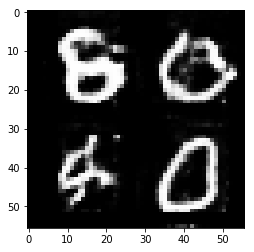

Epoch 2/2... Discriminator Loss: 1.8446... Generator Loss: 0.3342
Epoch 2/2... Discriminator Loss: 0.9490... Generator Loss: 1.1287
Epoch 2/2... Discriminator Loss: 0.9756... Generator Loss: 1.4252
Epoch 2/2... Discriminator Loss: 1.1011... Generator Loss: 0.8006
Epoch 2/2... Discriminator Loss: 1.0501... Generator Loss: 1.2851
Epoch 2/2... Discriminator Loss: 1.1266... Generator Loss: 0.8129
Epoch 2/2... Discriminator Loss: 1.0902... Generator Loss: 0.8706
Epoch 2/2... Discriminator Loss: 0.7031... Generator Loss: 1.9309
Epoch 2/2... Discriminator Loss: 1.0463... Generator Loss: 0.8203
Epoch 2/2... Discriminator Loss: 1.5626... Generator Loss: 0.4461


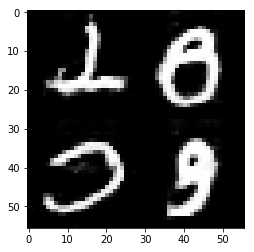

Epoch 2/2... Discriminator Loss: 0.7304... Generator Loss: 1.7003
Epoch 2/2... Discriminator Loss: 1.0012... Generator Loss: 1.1082
Epoch 2/2... Discriminator Loss: 1.1034... Generator Loss: 1.8078
Epoch 2/2... Discriminator Loss: 0.8629... Generator Loss: 1.5211
Epoch 2/2... Discriminator Loss: 0.8718... Generator Loss: 1.1122
Epoch 2/2... Discriminator Loss: 0.8310... Generator Loss: 1.1770
Epoch 2/2... Discriminator Loss: 0.8236... Generator Loss: 1.4696
Epoch 2/2... Discriminator Loss: 0.9766... Generator Loss: 0.9829
Epoch 2/2... Discriminator Loss: 1.0105... Generator Loss: 2.4275
Epoch 2/2... Discriminator Loss: 1.2813... Generator Loss: 1.9281


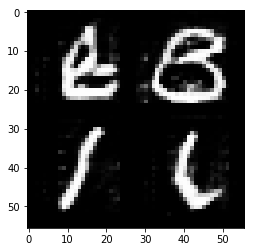

Epoch 2/2... Discriminator Loss: 1.1060... Generator Loss: 1.5977
Epoch 2/2... Discriminator Loss: 1.4177... Generator Loss: 0.5666
Epoch 2/2... Discriminator Loss: 1.1492... Generator Loss: 0.7170
Epoch 2/2... Discriminator Loss: 1.3187... Generator Loss: 0.6091
Epoch 2/2... Discriminator Loss: 1.3347... Generator Loss: 2.1880
Epoch 2/2... Discriminator Loss: 0.9729... Generator Loss: 1.2702
Epoch 2/2... Discriminator Loss: 0.9290... Generator Loss: 1.0880


In [23]:
batch_size = 64 #(~16 to 64); the lower the batch size, the lower the learning rate
z_dim = 50 # 100/128 is a reasonably good choice here
learning_rate = 0.0004 # Should be between 0.0001 and 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

3
Epoch 1/1... Discriminator Loss: 0.4926... Generator Loss: 4.0576
Epoch 1/1... Discriminator Loss: 0.3888... Generator Loss: 7.9701
Epoch 1/1... Discriminator Loss: 0.4214... Generator Loss: 9.3815
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 8.5327
Epoch 1/1... Discriminator Loss: 0.4106... Generator Loss: 5.2190
Epoch 1/1... Discriminator Loss: 0.3579... Generator Loss: 4.8108
Epoch 1/1... Discriminator Loss: 1.1593... Generator Loss: 1.5982
Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 3.9885
Epoch 1/1... Discriminator Loss: 0.7722... Generator Loss: 1.8178
Epoch 1/1... Discriminator Loss: 0.8838... Generator Loss: 2.1336


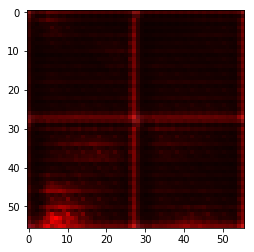

Epoch 1/1... Discriminator Loss: 0.6239... Generator Loss: 2.4635
Epoch 1/1... Discriminator Loss: 0.6746... Generator Loss: 2.2358
Epoch 1/1... Discriminator Loss: 0.7370... Generator Loss: 3.4165
Epoch 1/1... Discriminator Loss: 0.6645... Generator Loss: 5.8669
Epoch 1/1... Discriminator Loss: 0.4342... Generator Loss: 4.7553
Epoch 1/1... Discriminator Loss: 0.5495... Generator Loss: 2.3164
Epoch 1/1... Discriminator Loss: 2.9726... Generator Loss: 5.7023
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 1.5872
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 1.1495
Epoch 1/1... Discriminator Loss: 1.7413... Generator Loss: 0.7870


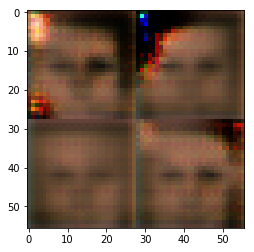

Epoch 1/1... Discriminator Loss: 1.7689... Generator Loss: 0.3595
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 1.7952
Epoch 1/1... Discriminator Loss: 1.8700... Generator Loss: 0.3237
Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 1.9350
Epoch 1/1... Discriminator Loss: 2.3833... Generator Loss: 3.2311
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 2.6108
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.2725... Generator Loss: 1.1838
Epoch 1/1... Discriminator Loss: 1.6938... Generator Loss: 2.5598


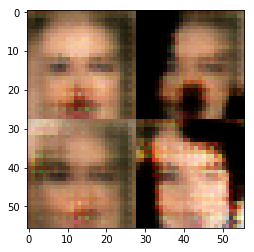

Epoch 1/1... Discriminator Loss: 1.5807... Generator Loss: 0.5720
Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.9875
Epoch 1/1... Discriminator Loss: 0.7184... Generator Loss: 1.8106
Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 1.3316
Epoch 1/1... Discriminator Loss: 2.2941... Generator Loss: 0.2512
Epoch 1/1... Discriminator Loss: 2.1511... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 1.0903
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 2.5180
Epoch 1/1... Discriminator Loss: 1.0517... Generator Loss: 1.9847


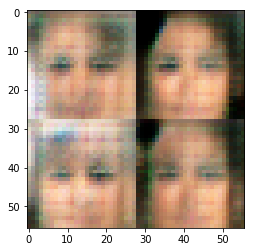

Epoch 1/1... Discriminator Loss: 3.9738... Generator Loss: 4.6737
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 2.2609
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.4796... Generator Loss: 2.0209
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 2.3347
Epoch 1/1... Discriminator Loss: 2.6160... Generator Loss: 3.4318


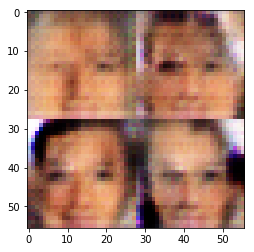

Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 1.7939
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 1.8279
Epoch 1/1... Discriminator Loss: 1.5660... Generator Loss: 0.8955
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.6899
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 1.1282... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.5733... Generator Loss: 1.3369
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 1.0795


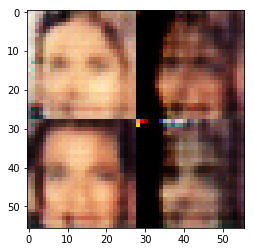

Epoch 1/1... Discriminator Loss: 1.5179... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.5807... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 0.9642... Generator Loss: 1.6414
Epoch 1/1... Discriminator Loss: 1.7938... Generator Loss: 1.5146
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 1.2604
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 1.1844
Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 1.3899
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.7364


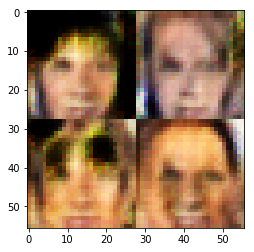

Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 1.1302... Generator Loss: 0.9225
Epoch 1/1... Discriminator Loss: 2.9032... Generator Loss: 0.1395
Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 1.4188
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 0.9149... Generator Loss: 1.2966
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.9033... Generator Loss: 0.2854
Epoch 1/1... Discriminator Loss: 1.5544... Generator Loss: 0.7415
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.8145


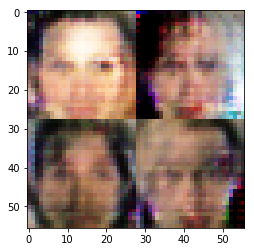

Epoch 1/1... Discriminator Loss: 2.0325... Generator Loss: 0.2736
Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.5718... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 1.7243... Generator Loss: 0.4254
Epoch 1/1... Discriminator Loss: 1.7444... Generator Loss: 0.3699
Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.9435
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.6688... Generator Loss: 0.4649
Epoch 1/1... Discriminator Loss: 2.5588... Generator Loss: 2.3149
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.9057


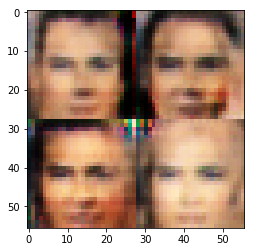

Epoch 1/1... Discriminator Loss: 1.5307... Generator Loss: 0.5417
Epoch 1/1... Discriminator Loss: 3.4386... Generator Loss: 4.2333
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 1.0359
Epoch 1/1... Discriminator Loss: 1.1773... Generator Loss: 1.4751
Epoch 1/1... Discriminator Loss: 2.6048... Generator Loss: 3.0310
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.9210
Epoch 1/1... Discriminator Loss: 1.0922... Generator Loss: 1.6171
Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.7819
Epoch 1/1... Discriminator Loss: 1.1524... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.5258... Generator Loss: 1.8233


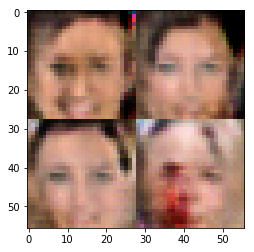

Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 1.2129
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 1.2917... Generator Loss: 1.6247
Epoch 1/1... Discriminator Loss: 1.1060... Generator Loss: 1.0136
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.7210
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.0090... Generator Loss: 1.1016
Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.4488
Epoch 1/1... Discriminator Loss: 1.5301... Generator Loss: 0.5822
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 1.5066


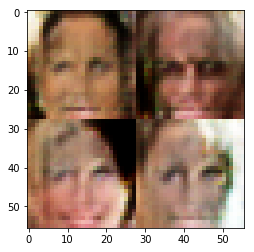

Epoch 1/1... Discriminator Loss: 1.5143... Generator Loss: 0.8574
Epoch 1/1... Discriminator Loss: 1.5627... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 0.8557
Epoch 1/1... Discriminator Loss: 1.2397... Generator Loss: 1.3136
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 1.3013
Epoch 1/1... Discriminator Loss: 1.5518... Generator Loss: 2.3961
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.9454
Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 0.7405


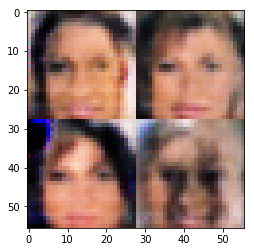

Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 1.8733
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.9773
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.8864
Epoch 1/1... Discriminator Loss: 2.0294... Generator Loss: 2.3788
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 0.8927
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 1.5092
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.9762
Epoch 1/1... Discriminator Loss: 1.5048... Generator Loss: 0.9792
Epoch 1/1... Discriminator Loss: 1.6712... Generator Loss: 0.4375


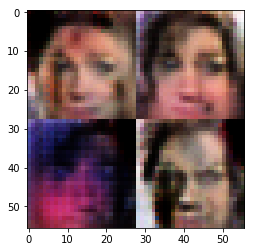

Epoch 1/1... Discriminator Loss: 1.7470... Generator Loss: 0.4074
Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.3225
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.9311
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 1.0882
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 1.0073
Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 1.0603
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.4271


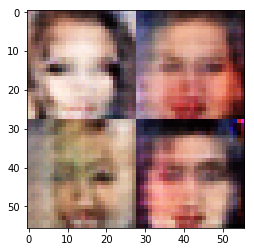

Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 0.8112
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.0787
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.9219
Epoch 1/1... Discriminator Loss: 1.2838... Generator Loss: 1.0993
Epoch 1/1... Discriminator Loss: 1.1319... Generator Loss: 1.3045
Epoch 1/1... Discriminator Loss: 1.6809... Generator Loss: 0.3631
Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 0.8106
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.5287... Generator Loss: 0.5553


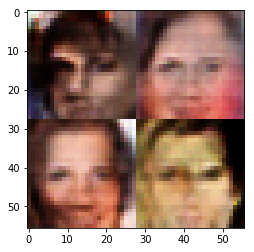

Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.8028... Generator Loss: 2.2597
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 1.6289
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 1.1917
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 1.6790
Epoch 1/1... Discriminator Loss: 1.5324... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 0.4199... Generator Loss: 3.8686
Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 1.4153
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 1.0449


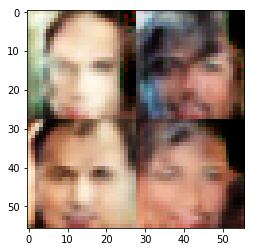

Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 1.1801
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.5880
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 1.8281... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 1.4822
Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 0.5208
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 1.2699


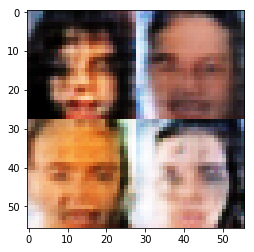

Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 1.4623
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 1.4853
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 2.0319
Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 0.9840
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 1.2202
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.5826
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.9610


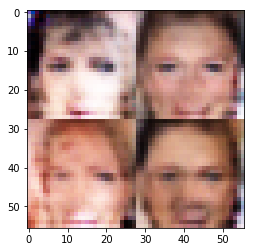

KeyboardInterrupt: 

In [12]:
#batch_size = 128
#z_dim = 100
#learning_rate = 0.0002
#beta1 = 0.5


batch_size = 64 #(~16 to 64); the lower the batch size, the lower the learning rate
z_dim = 128 # 
learning_rate = 0.0006 # Should be between 0.0001 and 0.0008
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.